In [3]:
import pandas as pd  # For handling dataframes and data manipulation
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Load the CSV file into a DataFrame
file_path = 'csv/data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Display the first few rows to verify the import
df.head()


,Year,County of Program Location,Program Category,Service Type,Age Group,Primary Substance Group,Admissions
0,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Alcohol,25
1,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,All Others,7
2,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Cocaine incl Crack,1
3,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Heroin,64
4,2017,Albany,Crisis,Medically Managed Detoxification,18 thru 24,Other Opioids,20


In [5]:
admission_year = df.groupby('Year')['Admissions'].sum().reset_index()
admission_year.head()

,Year,Admissions
0,2007,305033
1,2008,310244
2,2009,311722
3,2010,309709
4,2011,303021


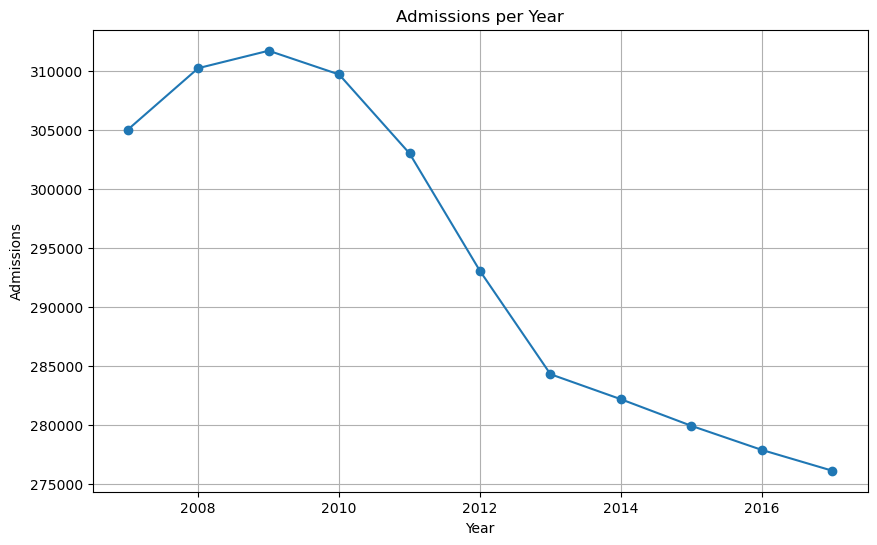

In [6]:

# Group by year and sum the Admissions
admission_year = df.groupby('Year')['Admissions'].sum().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(admission_year['Year'], admission_year['Admissions'], marker='o')
plt.title("Admissions per Year")
plt.xlabel("Year")
plt.ylabel("Admissions")
plt.grid(True)
plt.show()

In [7]:
admissions_substance_group = df.groupby(['Year', 'Primary Substance Group'])['Admissions'].sum().reset_index()
admissions_substance_group



,Year,Primary Substance Group,Admissions
0,2007,Alcohol,139225
1,2007,All Others,4936
2,2007,Cocaine incl Crack,49616
3,2007,Heroin,57314
4,2007,Marijuana incl Hashish,43973
...,...,...,...
61,2017,All Others,10923
62,2017,Cocaine incl Crack,22412
63,2017,Heroin,87594
64,2017,Marijuana incl Hashish,35554


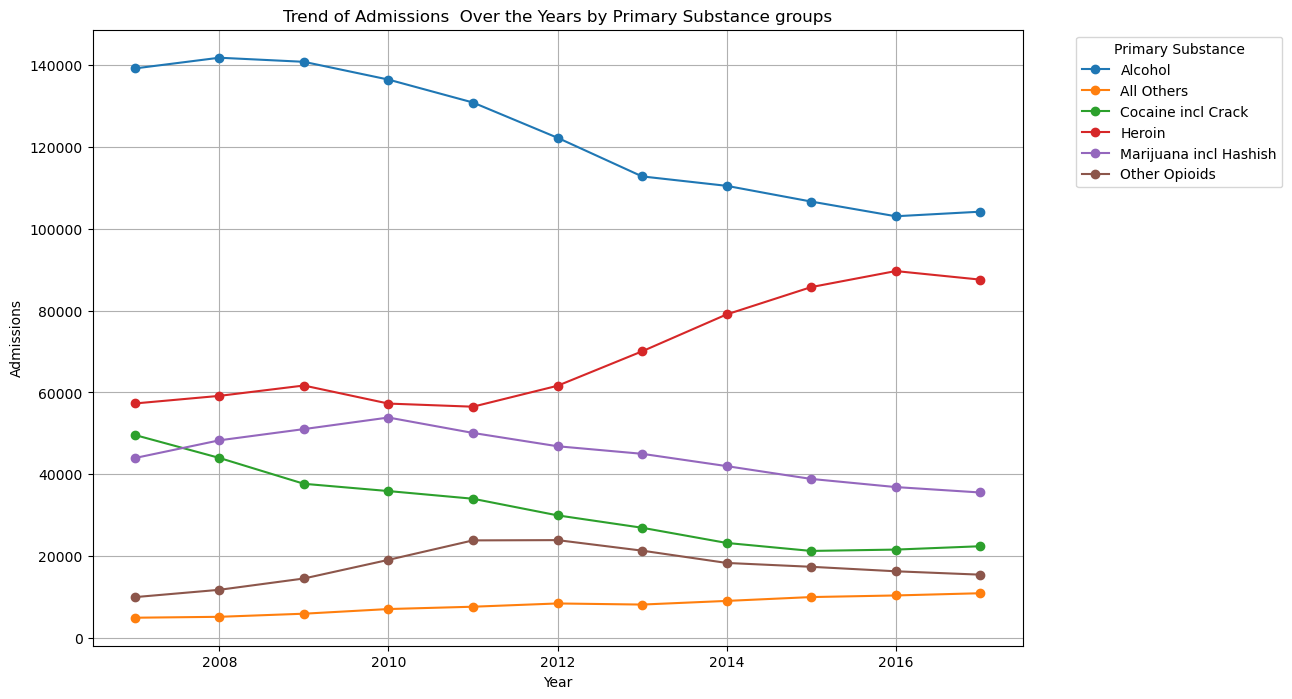

In [8]:
# Group by Year and Country, summing the Admissions
admissions_substance_group = df.groupby(['Year', 'Primary Substance Group'])['Admissions'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for subgroup in admissions_substance_group['Primary Substance Group'].unique():
    group_data = admissions_substance_group[admissions_substance_group['Primary Substance Group'] == subgroup]
    plt.plot(group_data['Year'], group_data['Admissions'], marker='o', label=subgroup)

plt.title("Trend of Admissions  Over the Years by Primary Substance groups")
plt.xlabel("Year")
plt.ylabel("Admissions")
plt.legend(title="Primary Substance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [9]:
admission_age = df.groupby('Age Group')['Admissions'].sum().reset_index()

admission_age

,Age Group,Admissions
0,18 thru 24,467432
1,25 thru 34,823350
2,35 thru 44,764262
3,45 thru 54,774307
4,55 and Older,300350
5,Under 18,103625


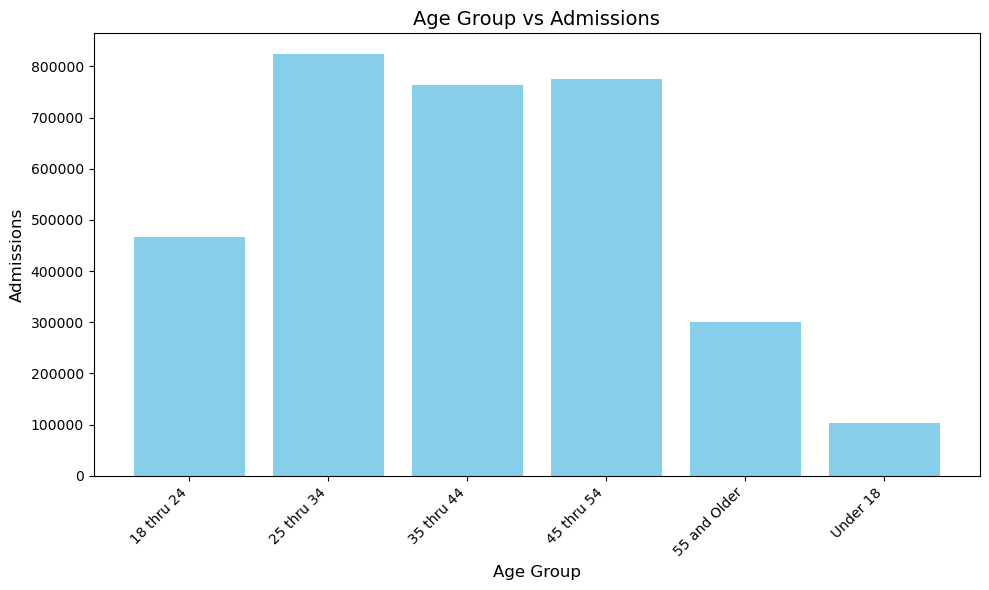

In [10]:

plt.figure(figsize=(10, 6))
plt.bar(admission_age['Age Group'], admission_age['Admissions'], color='skyblue')
# Adding title and labels
plt.title('Age Group vs Admissions', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Admissions', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

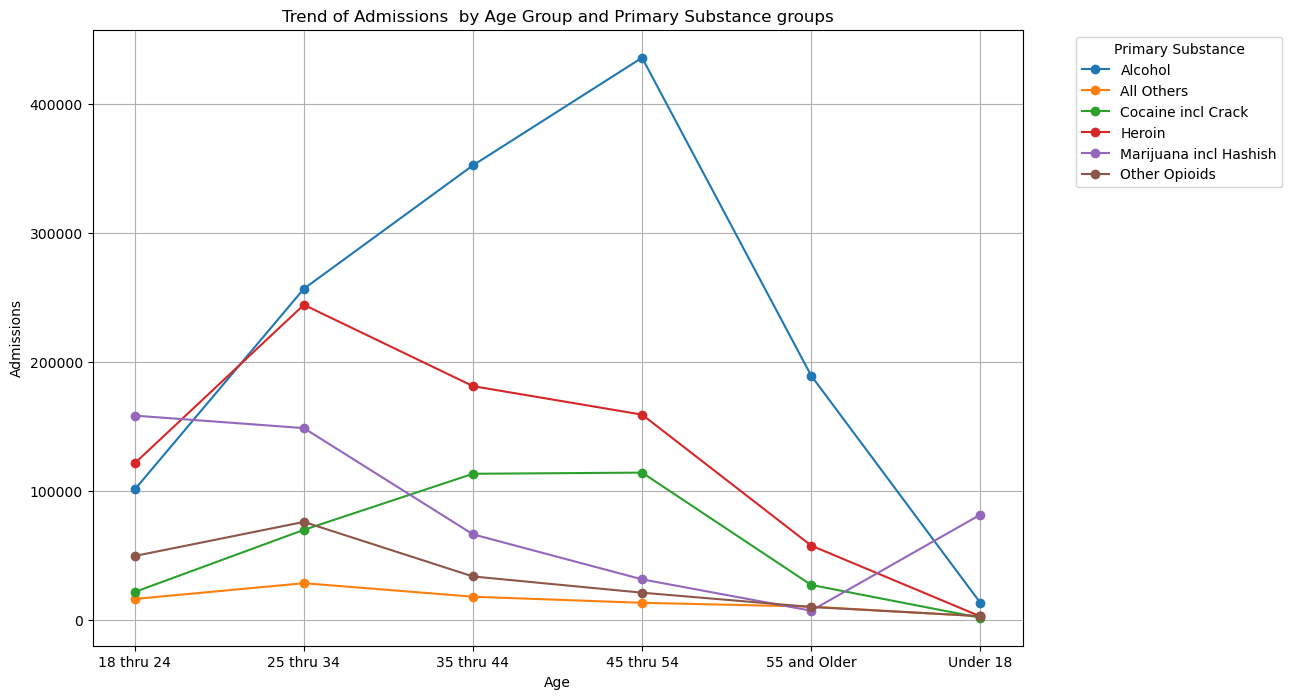

In [11]:
# Group by Year and Country, summing the Admissions
age_substance_group = df.groupby(['Age Group', 'Primary Substance Group'])['Admissions'].sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for subgroup in age_substance_group['Primary Substance Group'].unique():
    age_group_data = age_substance_group[age_substance_group['Primary Substance Group'] == subgroup]
    plt.plot( age_group_data['Age Group'],  age_group_data['Admissions'], marker='o', label=subgroup)

plt.title("Trend of Admissions  by Age Group and Primary Substance groups")
plt.xlabel("Age")
plt.ylabel("Admissions")
plt.legend(title="Primary Substance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Correlate the above data with amount of rehab facilities across key countries

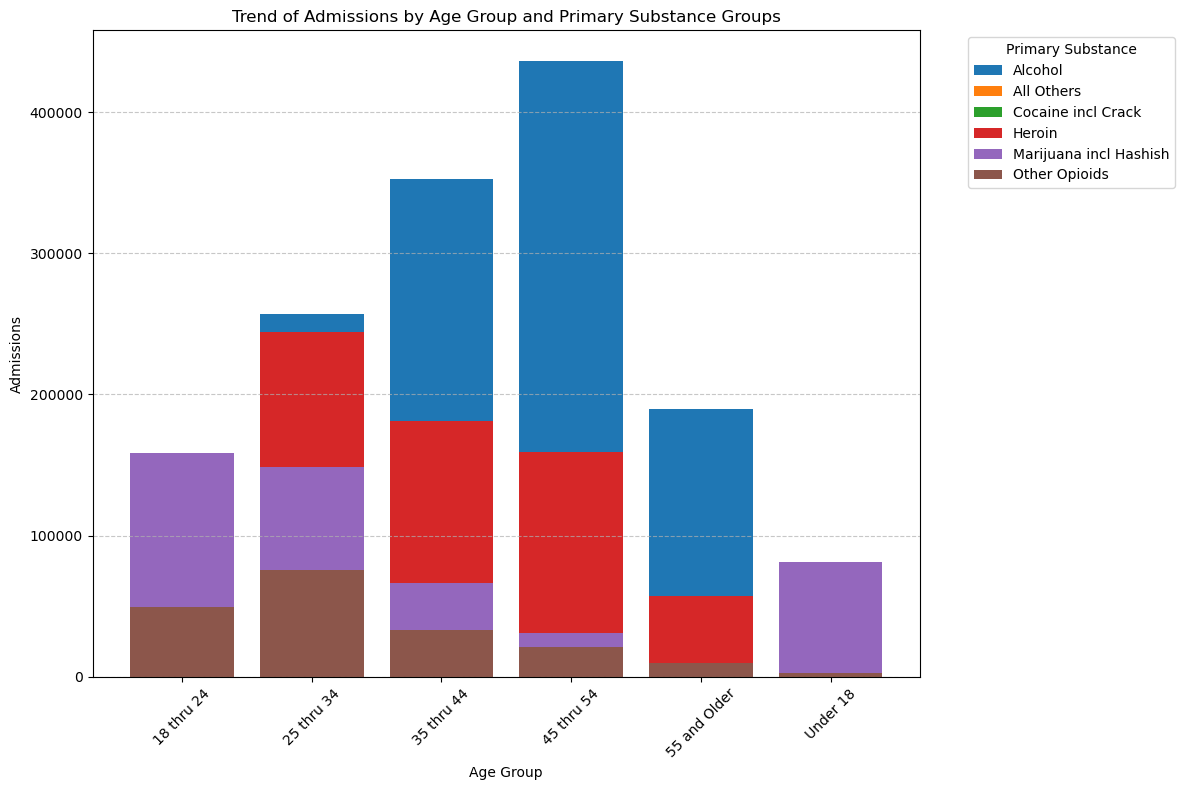

In [22]:
# Plotting a bar graph for admissions by age group and primary substance groups
plt.figure(figsize=(12, 8))
for subgroup in age_substance_group['Primary Substance Group'].unique():
    age_group_data = age_substance_group[age_substance_group['Primary Substance Group'] == subgroup]
    plt.bar(age_group_data['Age Group'], age_group_data['Admissions'], label=subgroup)

plt.title("Trend of Admissions by Age Group and Primary Substance Groups")
plt.xlabel("Age Group")
plt.ylabel("Admissions")
plt.legend(title="Primary Substance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()